# Cirrhosis Relevel Data Analysis Case Study

Cirrhosis Relevel Data Analysis One of The Relevel's Case Study Which Relevel Asks in Their Relevel Data Analytics Test. Here In this Case Study We are Going To Solve Business Questions You using Python's Data Analysis Kit. 

### What is Relevel ?

Relevel is India's first hiring tournament platform. At Relevel, job aspirants can get access to multiple jobs in dream companies. Relevel also gives companies easy access to source and select the best of candidates, pre-assessed on their aptitude, competencies and skills.

Relevel, an Unacademy Group Company, is India's first hiring platform that empowers job-seekers to showcase their skills through tests and get their dream job within 15 days.

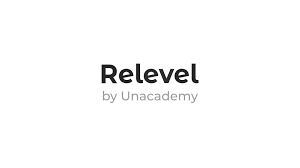

### What is Cirrhosis ?

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism.

Each time your liver is injured — whether by disease, excessive alcohol consumption or another cause — it tries to repair itself. In the process, scar tissue forms. As cirrhosis progresses, more and more scar tissue forms, making it difficult for the liver to function (decompensated cirrhosis). Advanced cirrhosis is life-threatening.

The liver damage done by cirrhosis generally can't be undone. But if liver cirrhosis is diagnosed early and the cause is treated, further damage can be limited and, rarely, reversed.

<img src="https://ak.picdn.net/shutterstock/videos/28176700/thumb/11.jpg">

### Cirrhosis Dataset
link : `https://raw.githubusercontent.com/mrblink2002/Cirrhosis_DataAnalysis_CaseStudy/master/Dataset/cirrhosis.csv`

Columns|Description
---|---
ID|Represents the ID of the Patient
N_Days|Number of Days Patient Under Treatment
Status|Current Status of the Patient
Drug|Drug Given to Patient
Age|Simply Age of Patient 
Sex|Gender of Patient 
Ascites | Variable To check Whether a Patient Have Ascites Or Not
Hepatomegaly | Variable To check Whether a Patient Have Hepatomegaly Or Not
Spiders | Variable To check Whether a Patient Have Spiders Or Not
Edema | Variable To check Whether a Patient Have Edema Or Not
Bilirubin | Variable To check Whether a Patient Have Bilirubin Or Not
Cholesterol | Cholesterol level of the Patient 
Albumin | Albumin level of the Patient
Copper | Level of Copper in Patient's Body
Alk_Phos| Level of Alkanic Phosphorous
SGOT | Level of SGOT in Patient's Body
Tryglicerides | Level of Tryglicerides in Patient's Body
Platelets | Amount of Platelets in Patient's Body
Prothrombin | Amount of Prothrombin in Patient's Body'
Stage | Stage of Cirrhosis